### 环境初始化

导入库

In [1]:
from typing import Sequence

import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scienceplots

环境配置

In [2]:
plt.style.use('science')

工具函数

In [3]:
def indexed_symbols(name: str, idxs: Sequence, typ = sp.Symbol, **assumptions):
    return tuple(typ(f'{name}_{i}', **assumptions) for i in idxs)

def plot(sol, name: str, fmt: str = 'pdf'):
    for i, y in enumerate(sol.y):
        plt.plot(sol.t, y, label=f"N_{i}")
    plt.xlabel("t")
    plt.ylabel("N")
    plt.savefig(f"./figures/{name}.{fmt}", format=fmt)
    plt.show()

定义符号

In [ ]:
t, r, K = sp.symbols('t r K')
N = sp.Function('N')(t)
alpha, beta = sp.symbols('alpha beta')
rs = r_1, r_2 = indexed_symbols('r', range(1, 3))
Ks = K_1, K_2 = indexed_symbols('K', range(1, 3))
Ns = N_1, N_2 = tuple(func(t) for func in indexed_symbols('N', range(1, 3), typ=sp.Function))

### Logistic 增长模型

In [5]:
logistic = sp.Eq(N.diff(t), r * N * (1 - N / K))
display(logistic)
logistic = sp.lambdify([t, N, r, K], logistic.rhs)

Eq(Derivative(N(t), t), r*(1 - N(t)/K)*N(t))

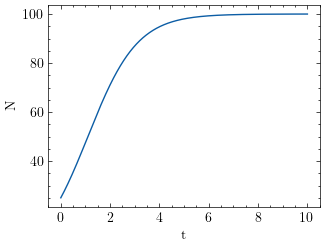

In [6]:
t_span = (0, 10)
y0 = [25]
r = 1
k = 100
sol = solve_ivp(logistic, t_span, y0, args=(r, k), max_step=0.01)
plot(sol, "logistic")

### Lotka-Volterra 竞争模型

In [7]:
lv1 = sp.Eq(N_1.diff(t), r_1 * N_1 * ((K_1 - N_1 - alpha * N_2) / K_1))
lv2 = sp.Eq(N_2.diff(t), r_2 * N_2 * ((K_2 - N_2 - beta * N_1) / K_2))
display(lv1, lv2)
lv1 = sp.lambdify([t, N_1, N_2, r_1, K_1, alpha], lv1.rhs)
lv2 = sp.lambdify([t, N_1, N_2, r_2, K_2, beta], lv2.rhs)
def lv(t, x: tuple, r: tuple, k: tuple, alpha: tuple):
    dxdt = lv1(t, *x, r[0], k[0], alpha[0])
    dydt = lv2(t, *x, r[1], k[1], alpha[1])
    return dxdt, dydt

Eq(Derivative(N_1(t), t), r_1*(K_1 - alpha*N_2(t) - N_1(t))*N_1(t)/K_1)

Eq(Derivative(N_2(t), t), r_2*(K_2 - beta*N_1(t) - N_2(t))*N_2(t)/K_2)

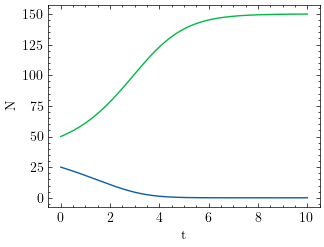

In [8]:
args = {
    r: (1, 1),
    K: (100, 150),
    alpha: (2, 3)
}
sol = solve_ivp(
    lv, 
    t_span=(0, 10), 
    y0=[25, 50], 
    args=args.values(), 
    max_step=0.01
)
plot(sol, "lotka-volterra")

In [9]:
# TODO: 更多模型